In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.feature as cfeature
import pandas as pd
import folium
import numpy as np
from matplotlib.colors import ListedColormap

In [2]:
mata_data = pd.read_csv("Processed Data/final rain nagev.csv")

In [3]:
mata_data['mean'] = mata_data['mean'].round(0) 

In [4]:
mata_data.head()

station name_He                 station name  E longitude  \
0                  צומת צפית               ZAFIT JUNCTION      35.1966   
1              מעבר נחל צבוע            NAHAL ZAVOA CROSS      34.8762   
2                  ירוחם סכר                  YEROHAM,DAM      34.8934   
3                  מעלה סדום                 SEDOM ASCENT      35.2806   
4  המכתש הגדול - שפה מערבית   HAMAKHTESH HAGADOL WEST RIM      34.9719   

   N latitiuot  Altitude above sea level (meters) The opening date   mean  \
0      31.0439                                385       1954-09-01   68.0   
1      31.0271                                430       1952-09-01  120.0   
2      30.9900                                460       1952-09-01   96.0   
3      31.0029                                 40       1955-09-01   51.0   
4      30.9722                                590       1961-09-01  103.0   

         std   min    max  
0  26.554911  20.0  137.0  
1  50.511440  30.0  264.0  
2  41.695475  28.0  255.0  
3  27.534387  10.0  133.0  
4  43.184039  32.0  207.0

#   <font color = 'orange'>Rain Meteorological Stations Reference Map</font>

In [5]:

# Create a map centered around Israel desert
m = folium.Map(location=[30.4461, 34.8516], zoom_start=8.4)

# Add markers for each station
for index, row in mata_data.iterrows():
    folium.Marker(
        location=[row['N latitiuot'], row['E longitude']],
        popup=row['station name_He'],  # Popup with Hebrew station name
        tooltip=row['station name'],   # Tooltip with English station name
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Display the map
m


# <font color = 'orange'> A map of the station names to depict the average amount of rain at each station. </font>
###  <font color = 'orange'>You can observe how the desert is subdivided into regions with varying precipitation levels.</font>

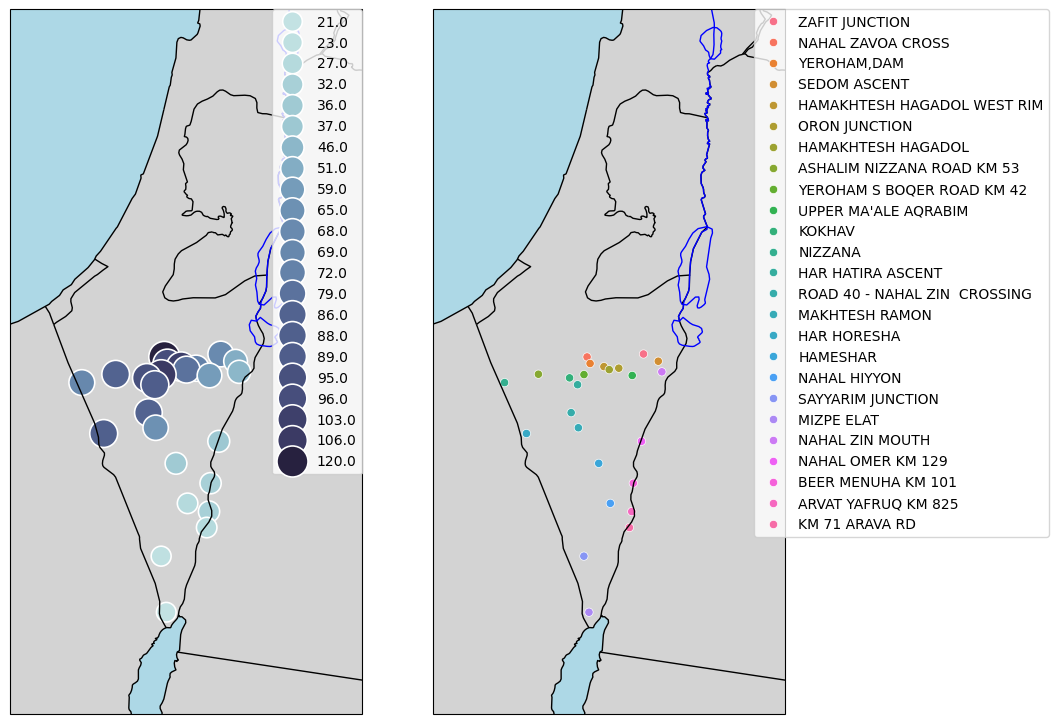

In [6]:


# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 16), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the first map meean rain at each station.
ax1 = axs[0]
ax1.set_extent([34, 36, 29, 33])  # Adjust extent to zoom in on Israel
ax1.coastlines(resolution='10m')
ax1.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1, edgecolor='black')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax1.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='none')
ax1.add_feature(cfeature.RIVERS, edgecolor='blue')
palette = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.scatterplot(data=mata_data, x='E longitude', y='N latitiuot', hue='mean', size='mean', sizes=(200, 500),
                palette=palette, legend='full', ax=ax1)
ax1.legend( bbox_to_anchor=(1.00, 1.0), borderaxespad=0.)

# Plot the second map
ax2 = axs[1]
ax2.set_extent([34, 36, 29, 33])  # Adjust extent to zoom in on Israel
ax2.coastlines(resolution='10m')
ax2.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1, edgecolor='black')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax2.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='none')
ax2.add_feature(cfeature.RIVERS, edgecolor='blue')
sns.scatterplot(data=mata_data, x='E longitude', y='N latitiuot', hue='station name', legend='full', ax=ax2)
ax2.legend( bbox_to_anchor=(1.75, 1.0), borderaxespad=0.)

# Show the plot
plt.show()



# upload and prepare the data, sort it according to the average precipitation.

In [7]:
stations = pd.read_csv('Processed Data/Good stations for analysis.csv')

In [8]:

# Convert the 'date' column to datetime if it's not already in datetime format
stations['date'] = pd.to_datetime(stations['date'])

stations_yearly = stations.copy()

# Set 'date' column as the index
stations_yearly.set_index('date', inplace=True)



# Calculate the mean for each column
column_averages = stations_yearly.mean()

# Sort the columns based on their averages
sorted_columns = column_averages.sort_values()

# Reorder the DataFrame columns based on the sorted column order
sorted_df = stations_yearly[sorted_columns.index]



In [9]:
stations_nan = pd.read_csv('Processed Data/Good stations for toltip map.csv')

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#stations_nan

In [11]:
stations_nan = stations_nan.drop(stations_nan.index[:36])


In [12]:
# Convert the 'date' column to datetime if it's not already in datetime format
stations_nan['date'] = pd.to_datetime(stations_nan['date'])

stations_yearly_nan = stations_nan.copy()

# Set 'date' column as the index
stations_yearly_nan.set_index('date', inplace=True)



# Calculate the mean for each column
column_averages = stations_yearly_nan.mean()

# Sort the columns based on their averages
sorted_columns = column_averages.sort_values()

# Reorder the DataFrame columns based on the sorted column order
sorted_nan = stations_yearly_nan[sorted_columns.index]

# Display the sorted DataFrame
#sorted_nan


In [13]:
stations_yearly_nan = sorted_nan.copy()


## Cumulative Rainfall over Time for Each Station 
####  We can observe how the desert is subdivided into regions with varying precipitation levels.

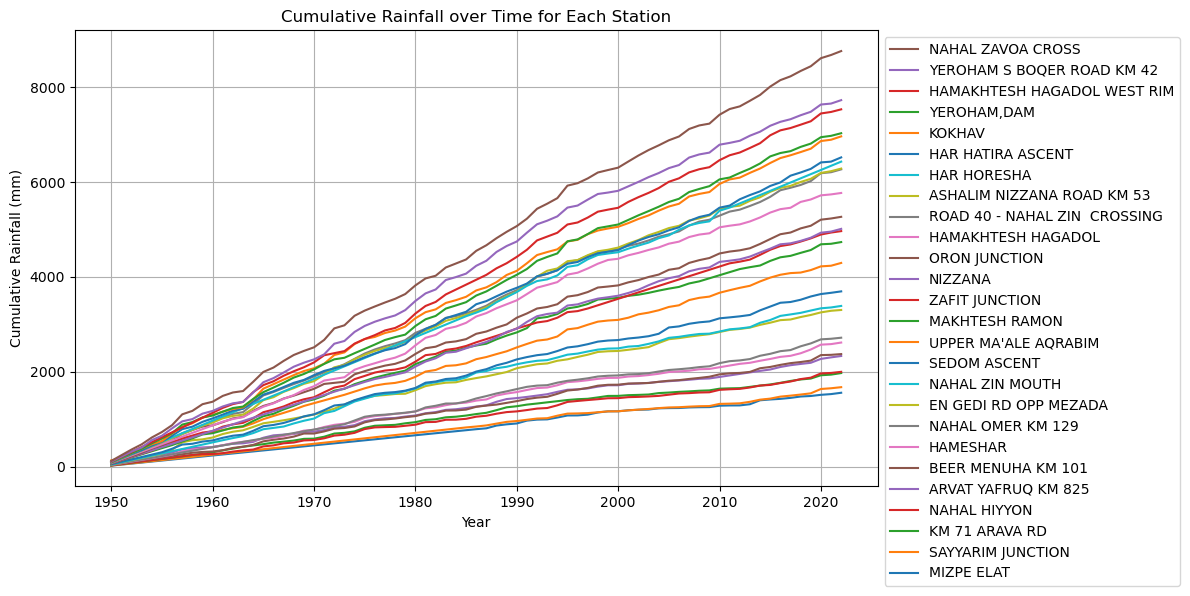

In [14]:



stations_yearly = sorted_df.copy()


# Aggregate rainfall by year for each station
stations_yearly = stations_yearly.resample('Y').sum()

# Plot cumulative rainfall over time for each station
plt.figure(figsize=(12, 6))
for column in stations_yearly.columns:
    plt.plot(stations_yearly.index, stations_yearly[column].cumsum(), label=column)

plt.title('Cumulative Rainfall over Time for Each Station')
plt.xlabel('Year')
plt.ylabel('Cumulative Rainfall (mm)')

# Reverse the order of the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.tight_layout()
plt.show()

## Distribution of Rainfall for Each Station
#### We can observe how the desert is subdivided into regions with varying precipitation levels.
#### The low value is more frequent than the high.

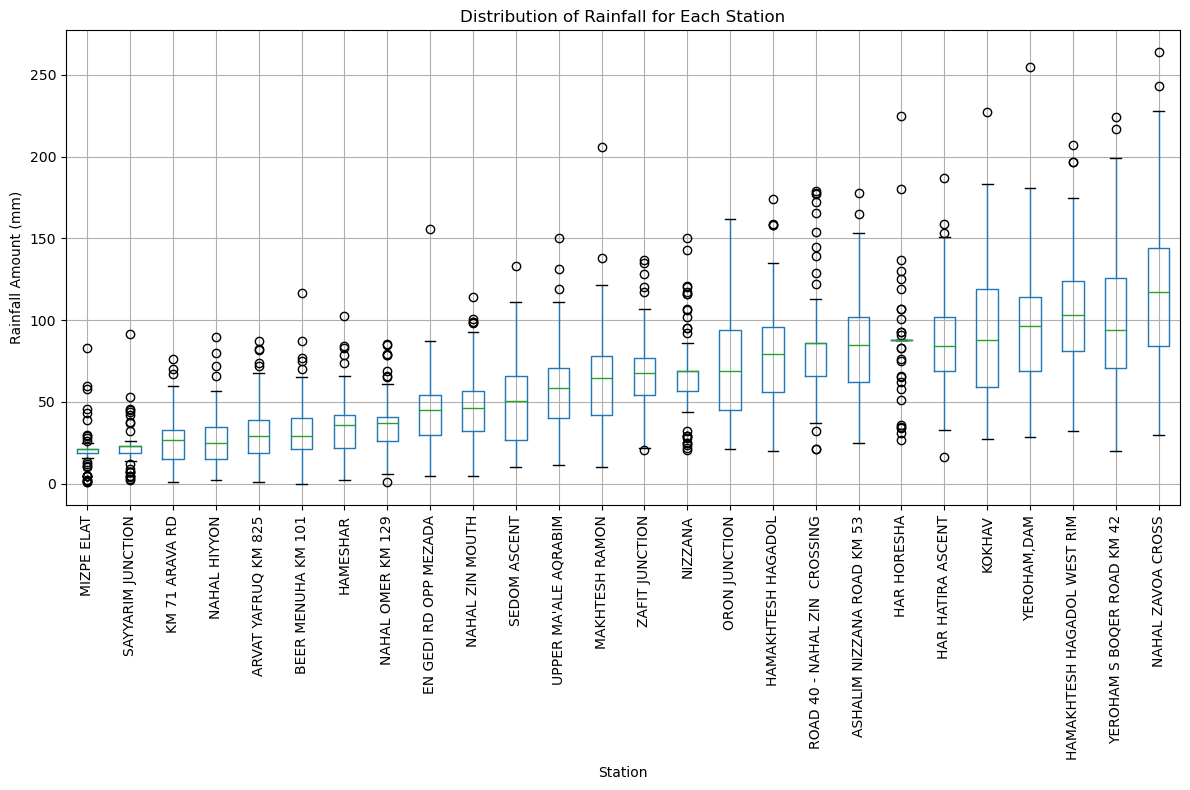

In [15]:
# Plot boxplots
plt.figure(figsize=(12, 8))
stations_yearly.boxplot(figsize=(14,8))
plt.title('Distribution of Rainfall for Each Station')
plt.ylabel('Rainfall Amount (mm)')
plt.xlabel('Station')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Rainfall Patterns Across Stations and Years
#### We can observe which years had more rainfall.

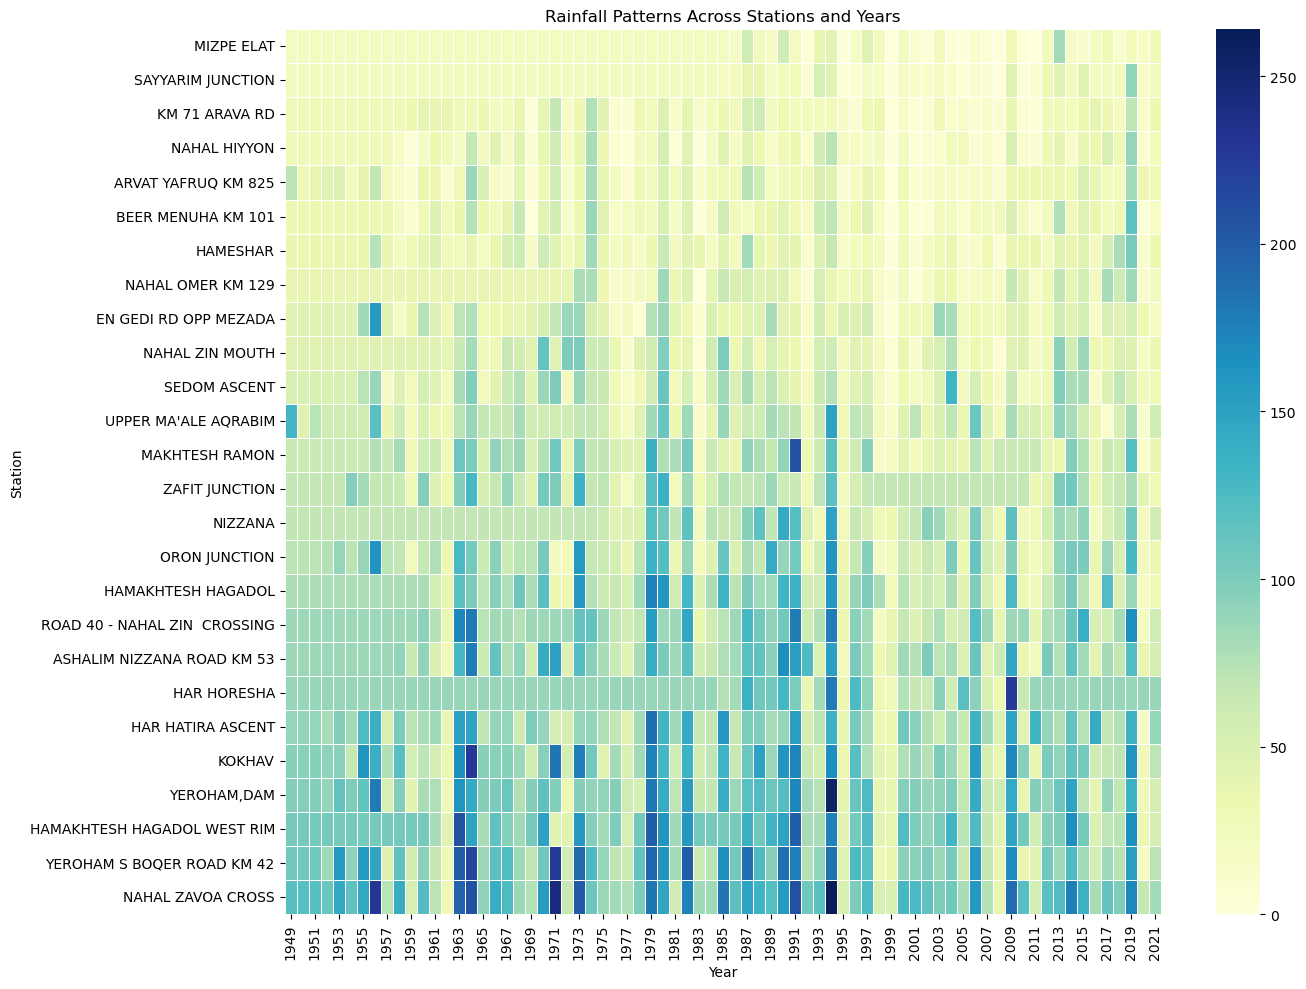

In [16]:
stations_yearly.index = stations_yearly.index.year


# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(stations_yearly.transpose(), cmap='YlGnBu', linewidths=0.5)
plt.title('Rainfall Patterns Across Stations and Years')
plt.xlabel('Year')
plt.ylabel('Station')
plt.yticks(rotation=0)  # Rotate y-axis labels for better readability
plt.tight_layout()
plt.show()

## Total Rainfall for Each Station from 1949
#### We can observe how the desert is subdivided into regions with varying precipitation levels.


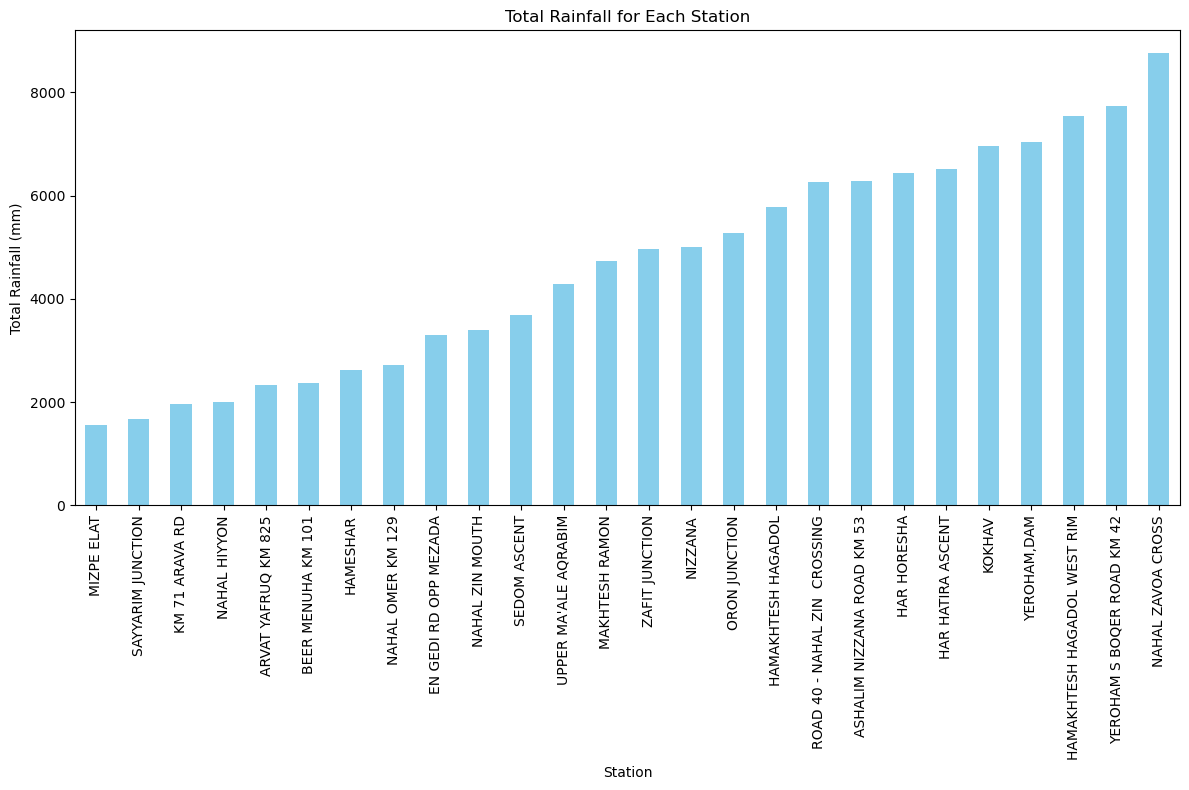

In [17]:
# Calculate total rainfall for each station
total_rainfall = stations_yearly.copy().sum()

# Create a bar chart
plt.figure(figsize=(12, 8))
total_rainfall.plot(kind='bar', color='skyblue')
plt.title('Total Rainfall for Each Station')
plt.xlabel('Station')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## The average versus the 5-year average.
#### We can observe that rainfall has decreased over the years, but it is not clear.

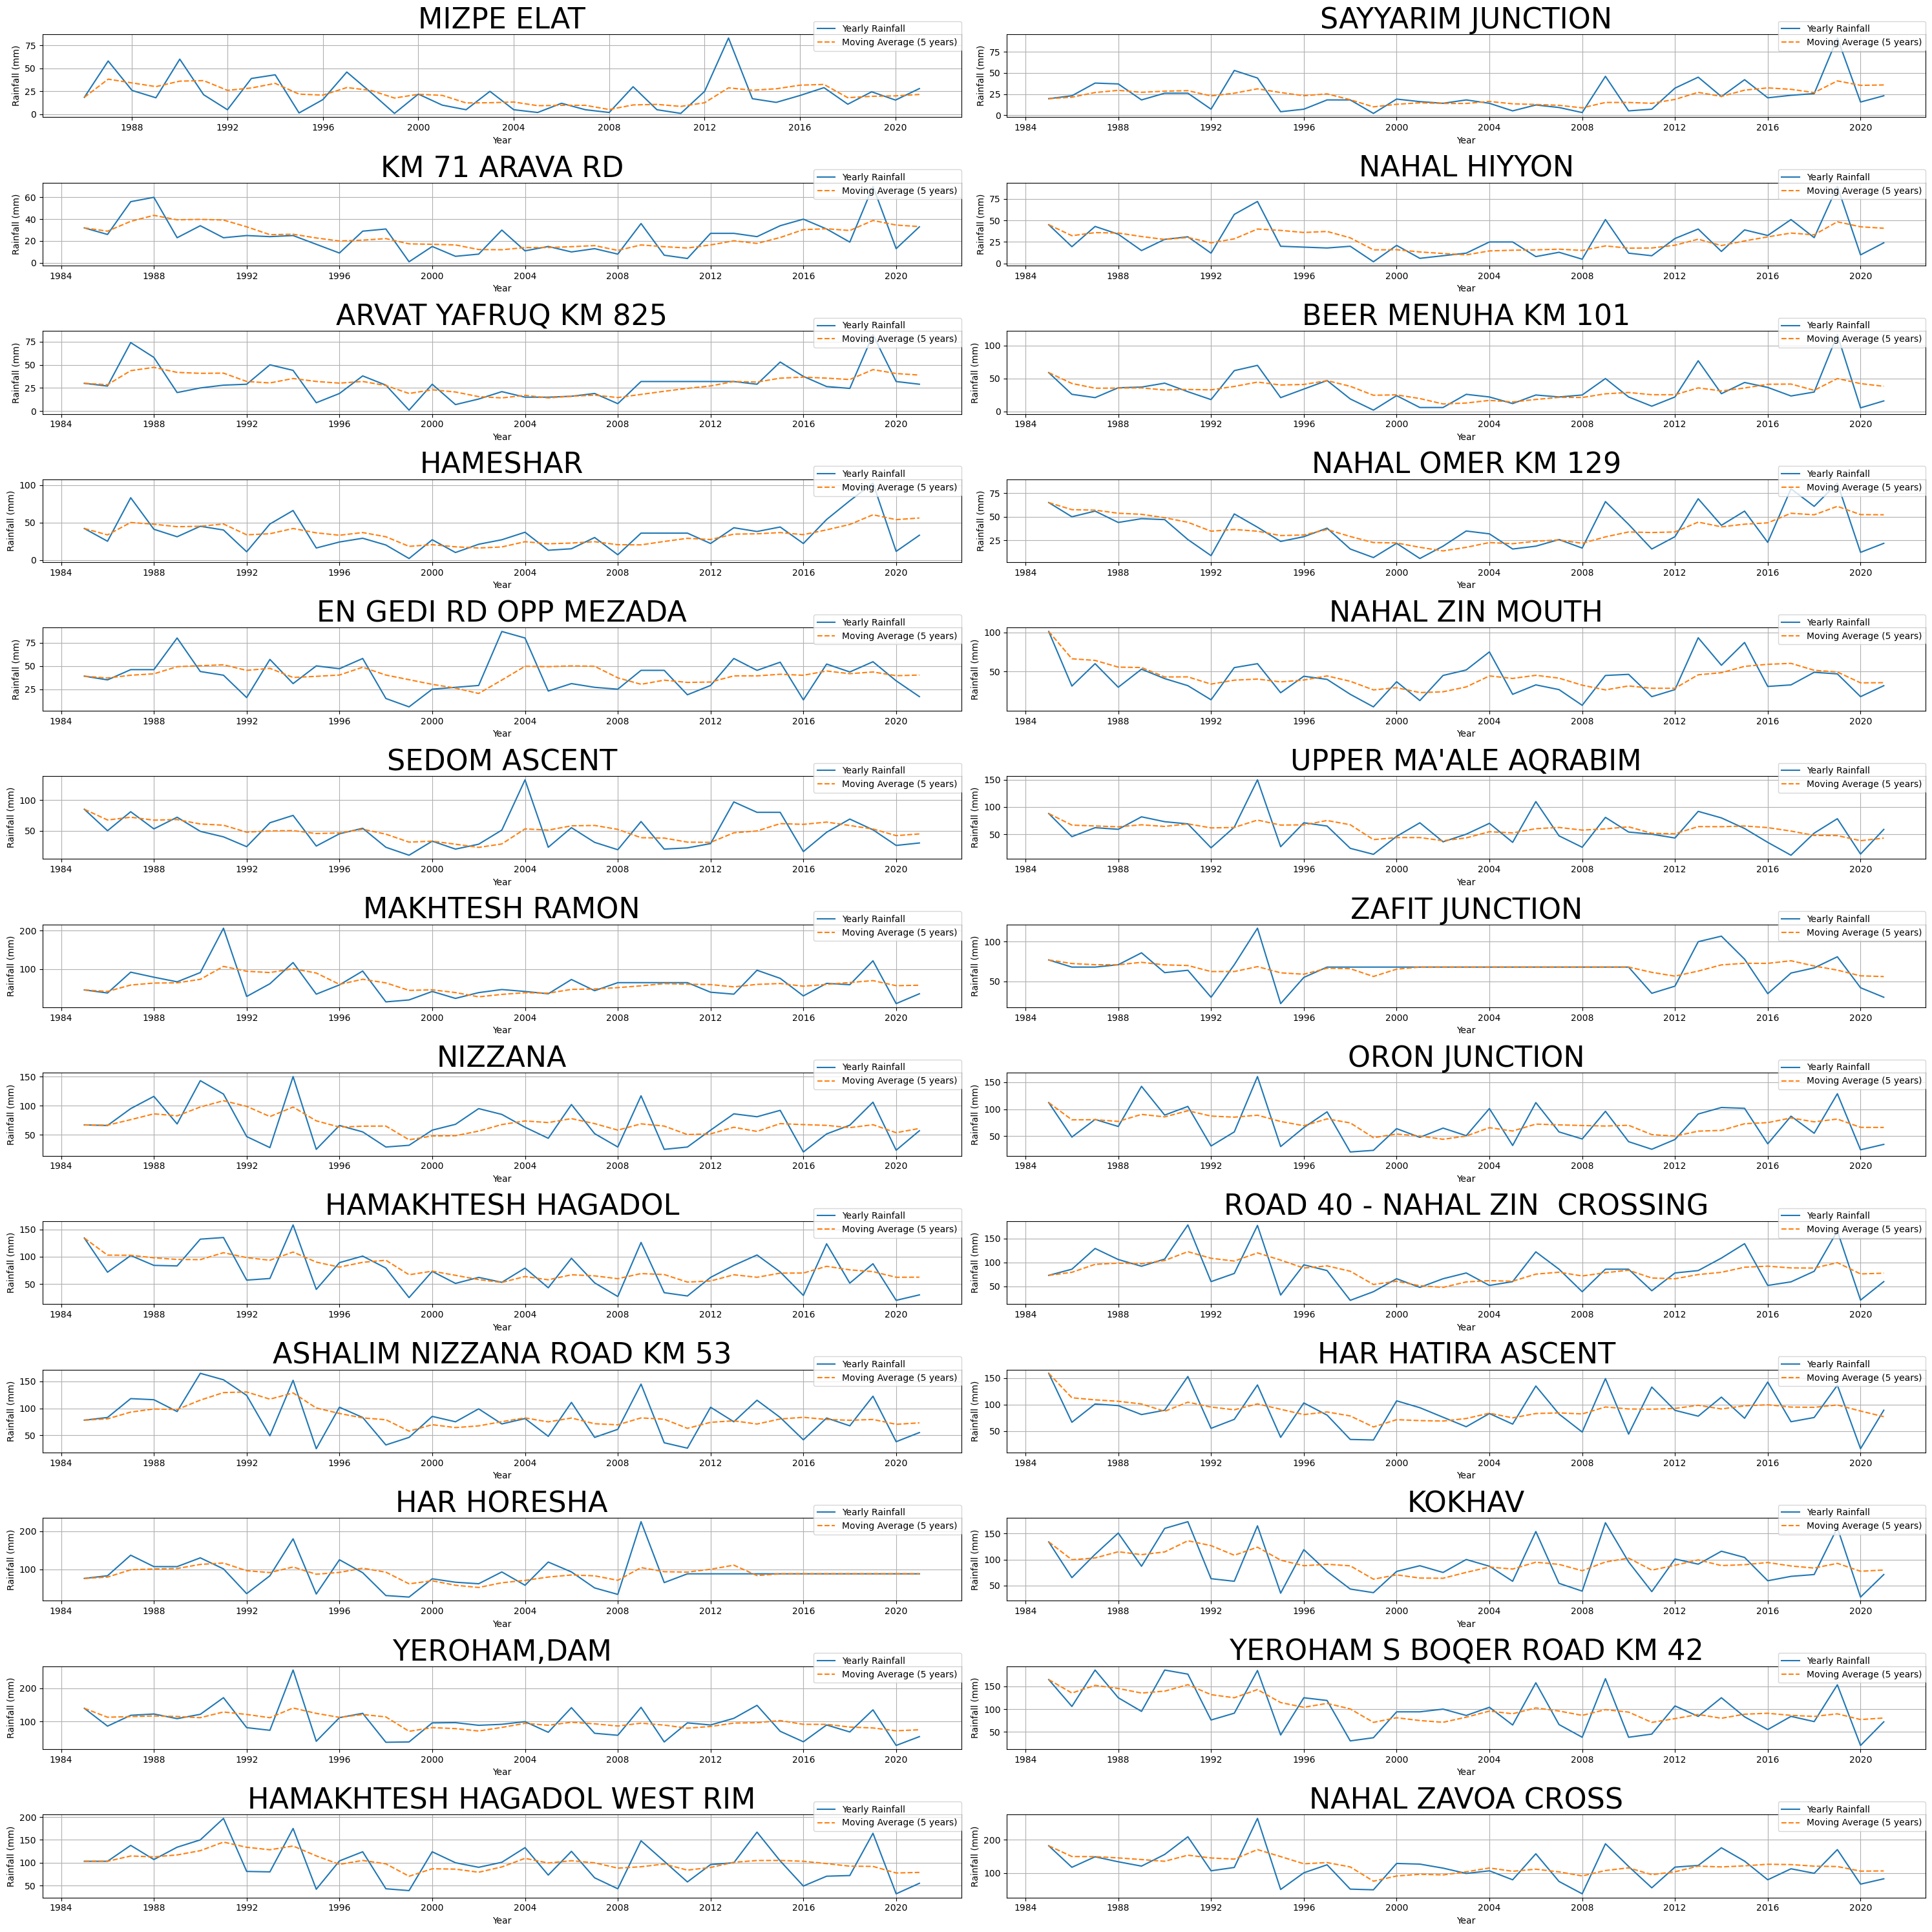

In [18]:

# Calculate moving average with a window of 5 years for each station
moving_avg = stations_yearly_nan.rolling(window=5, min_periods=1).mean()

# Create a 5 by 5 subplot grid
fig, axes = plt.subplots(13, 2, figsize=(30, 30))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot original data and moving average for each station separately
for i, column in enumerate(stations_yearly_nan.columns):
    ax = axes[i]
    ax.plot(stations_yearly_nan.index, stations_yearly_nan[column], label='Yearly Rainfall')
    ax.plot(moving_avg.index, moving_avg[column], label='Moving Average (5 years)', linestyle='--')
    ax.set_title(f'{column}', fontsize=32)#' Yearly Rainfall with Moving Average')
    ax.set_xlabel('Year')
    ax.set_ylabel('Rainfall (mm)')
    ax.legend(loc='lower right', bbox_to_anchor=(1.0, 0.8), borderaxespad=0.)
    ax.grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


## Violin plots depicting the distribution of rainfall amounts for each station display summary statistics and the density of each variable.
#### We can observe how the desert is subdivided into regions with varying precipitation levels.
#### The low value is more frequent than the high.

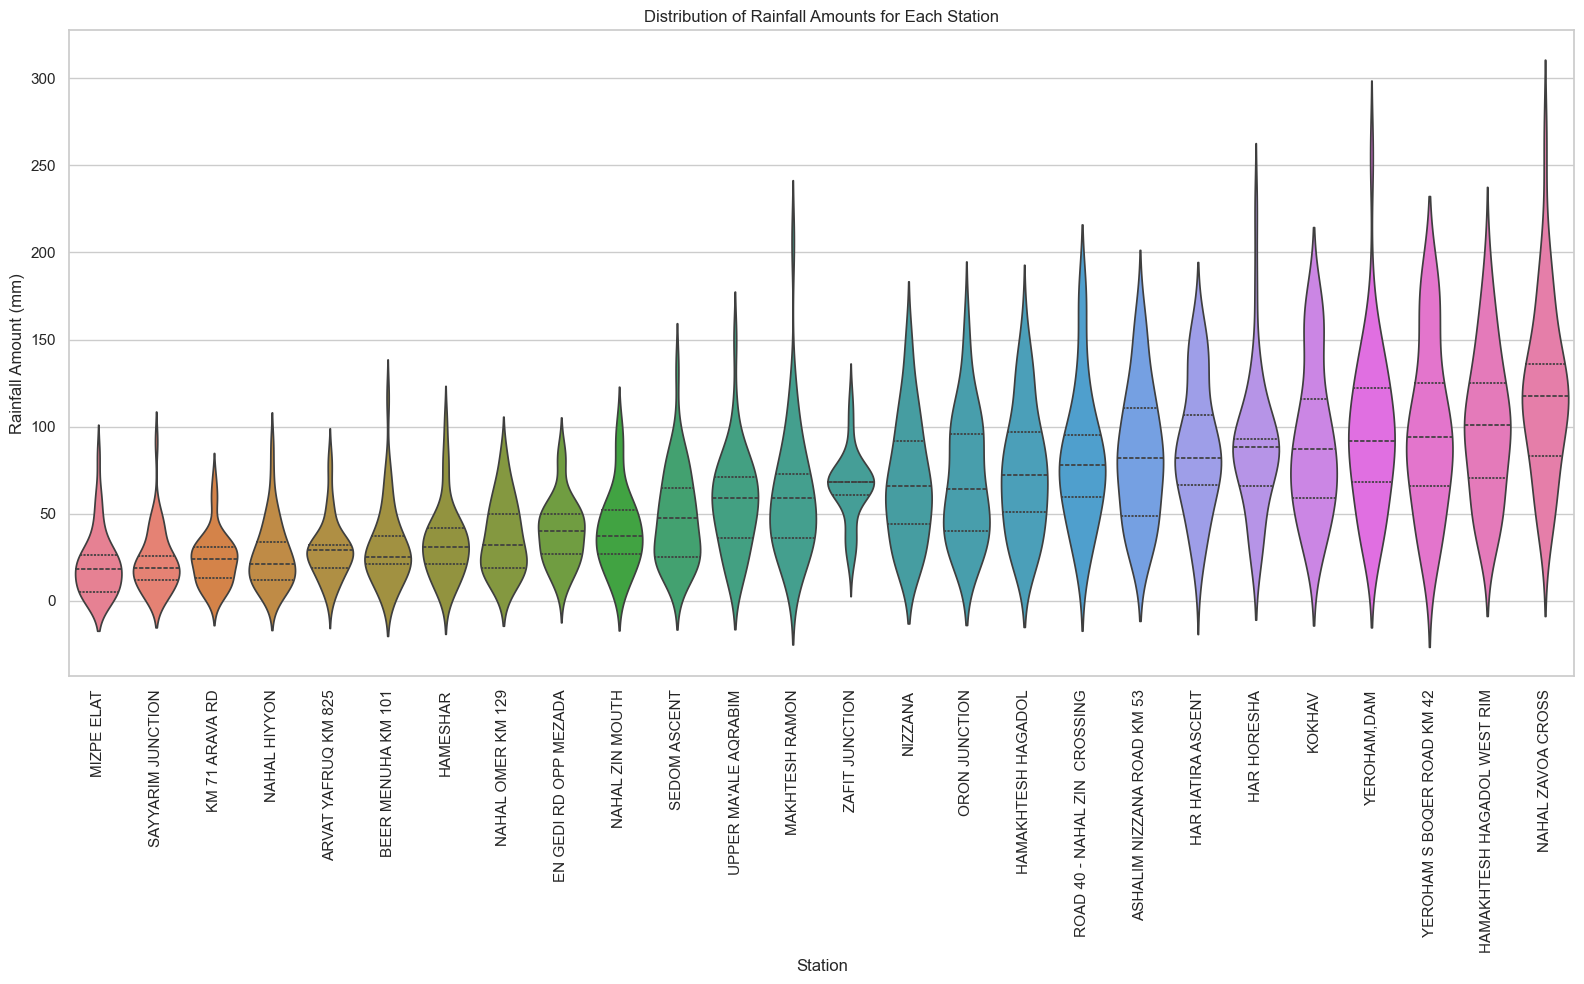

In [19]:


# Set the style of seaborn
sns.set(style="whitegrid")

# Plot violin plots for each station
plt.figure(figsize=(16, 10))
sns.violinplot(data=stations_yearly_nan, inner="quartile")
plt.title('Distribution of Rainfall Amounts for Each Station')
plt.xlabel('Station')
plt.ylabel('Rainfall Amount (mm)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


## Correlation Heatmap
#### In the next three visualizations, we can observe the correlation between desert regions with varying precipitation levels and the years.

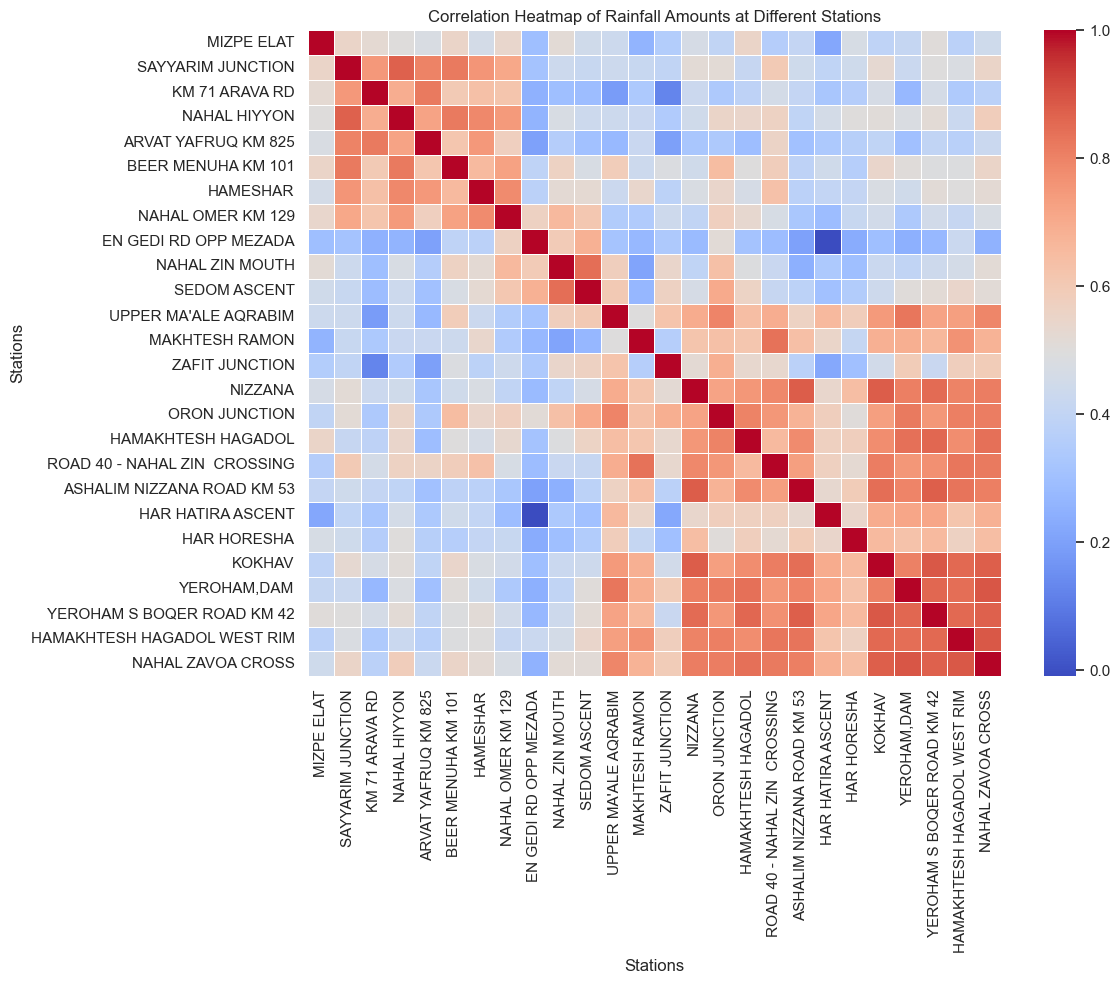

In [20]:


# Calculate the correlation matrix
correlation_matrix = stations_yearly_nan.corr()

# Create a heatmap without displaying correlation values
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Rainfall Amounts at Different Stations')
plt.xlabel('Stations')
plt.ylabel('Stations')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Rotate y-axis labels for better readability
plt.tight_layout()
plt.show()


C:\Users\nisan\AppData\Local\Temp\ipykernel_16676\2568168584.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1200x1000 with 0 Axes>

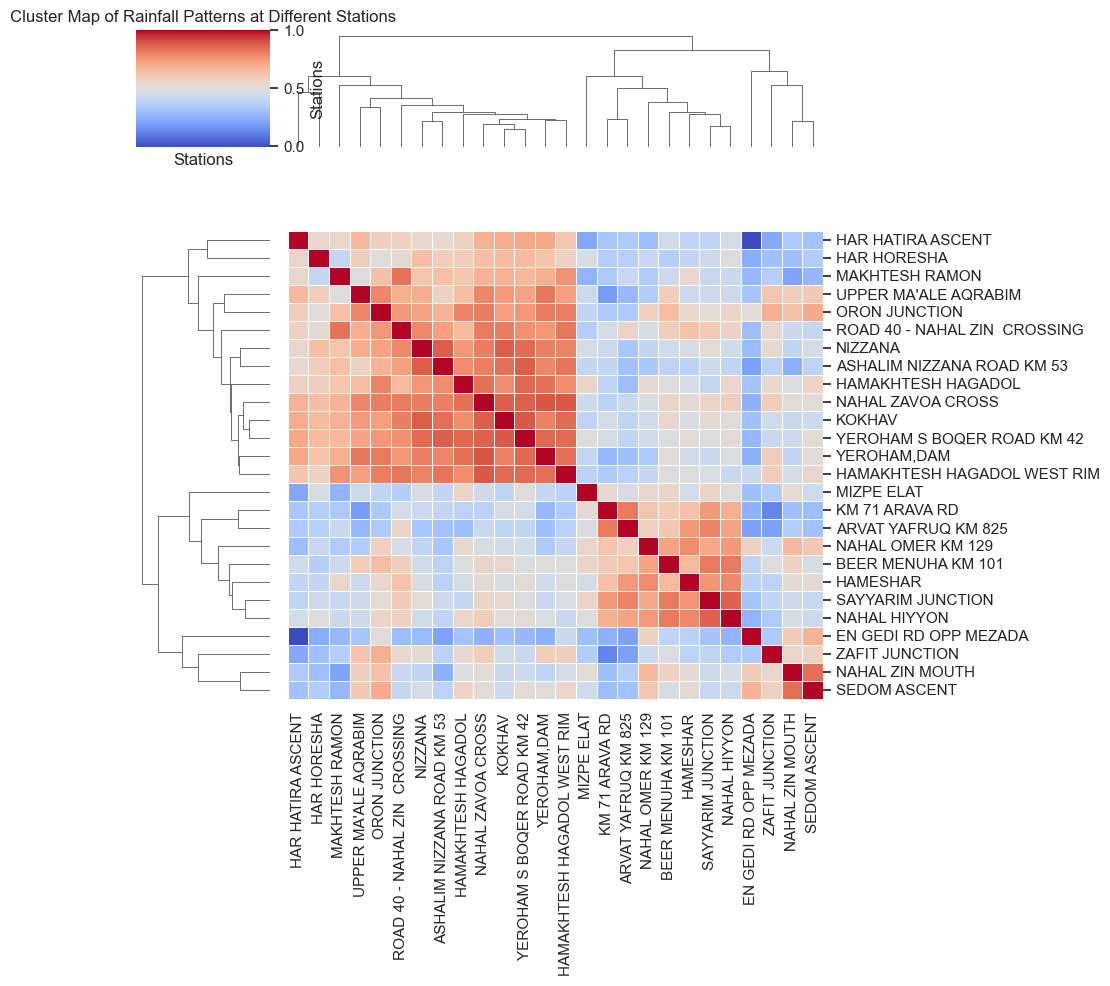

In [21]:


# Calculate the correlation matrix
correlation_matrix = stations_yearly_nan.corr()

# Create a cluster map
plt.figure(figsize=(12, 10))
sns.clustermap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Cluster Map of Rainfall Patterns at Different Stations')
plt.xlabel('Stations')
plt.ylabel('Stations')
plt.tight_layout()
plt.show()


C:\Users\nisan\AppData\Local\Temp\ipykernel_16676\2856091937.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1200x1000 with 0 Axes>

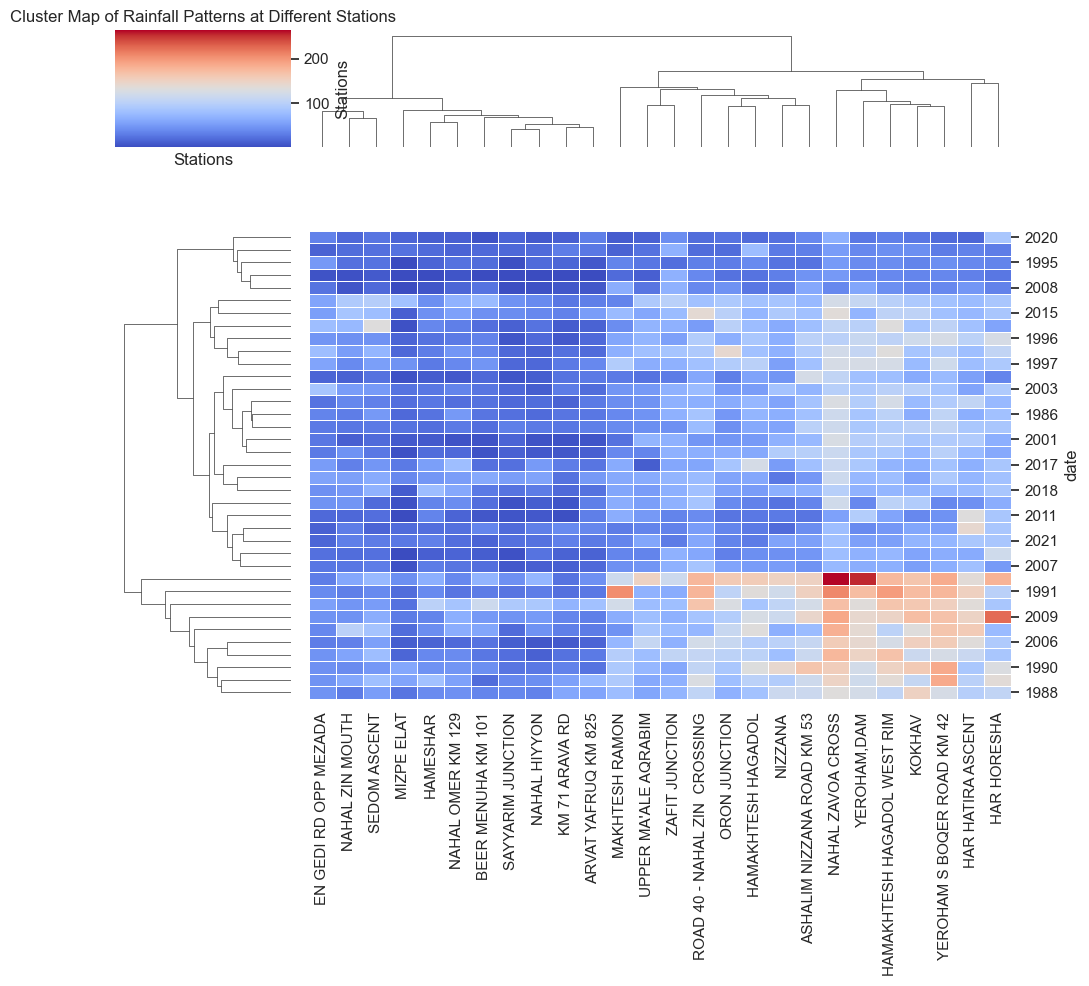

In [22]:



stations_yearly_nan.index = stations_yearly_nan.index.year


# Create a cluster map
plt.figure(figsize=(12, 10))
sns.clustermap(stations_yearly_nan.fillna(stations_yearly_nan.mean(axis=0)), cmap='coolwarm', linewidths=0.5)
plt.title('Cluster Map of Rainfall Patterns at Different Stations')
plt.xlabel('Stations')
plt.ylabel('Stations')
plt.tight_layout()
plt.show()


# Under the plot, there is an explanation.

In [23]:
df = pd.read_csv("Processed Data/Good stations for toltip map.csv") 
# Convert the date column to string if it's not already
date_column_name = 'date'
df[date_column_name] = df[date_column_name].astype(str)

# # # Set the date column as the index
df.set_index(date_column_name, inplace=True)
# # Extract the first year from the date column
df['year'] = df.index.str.split('-').str[0].astype(int)

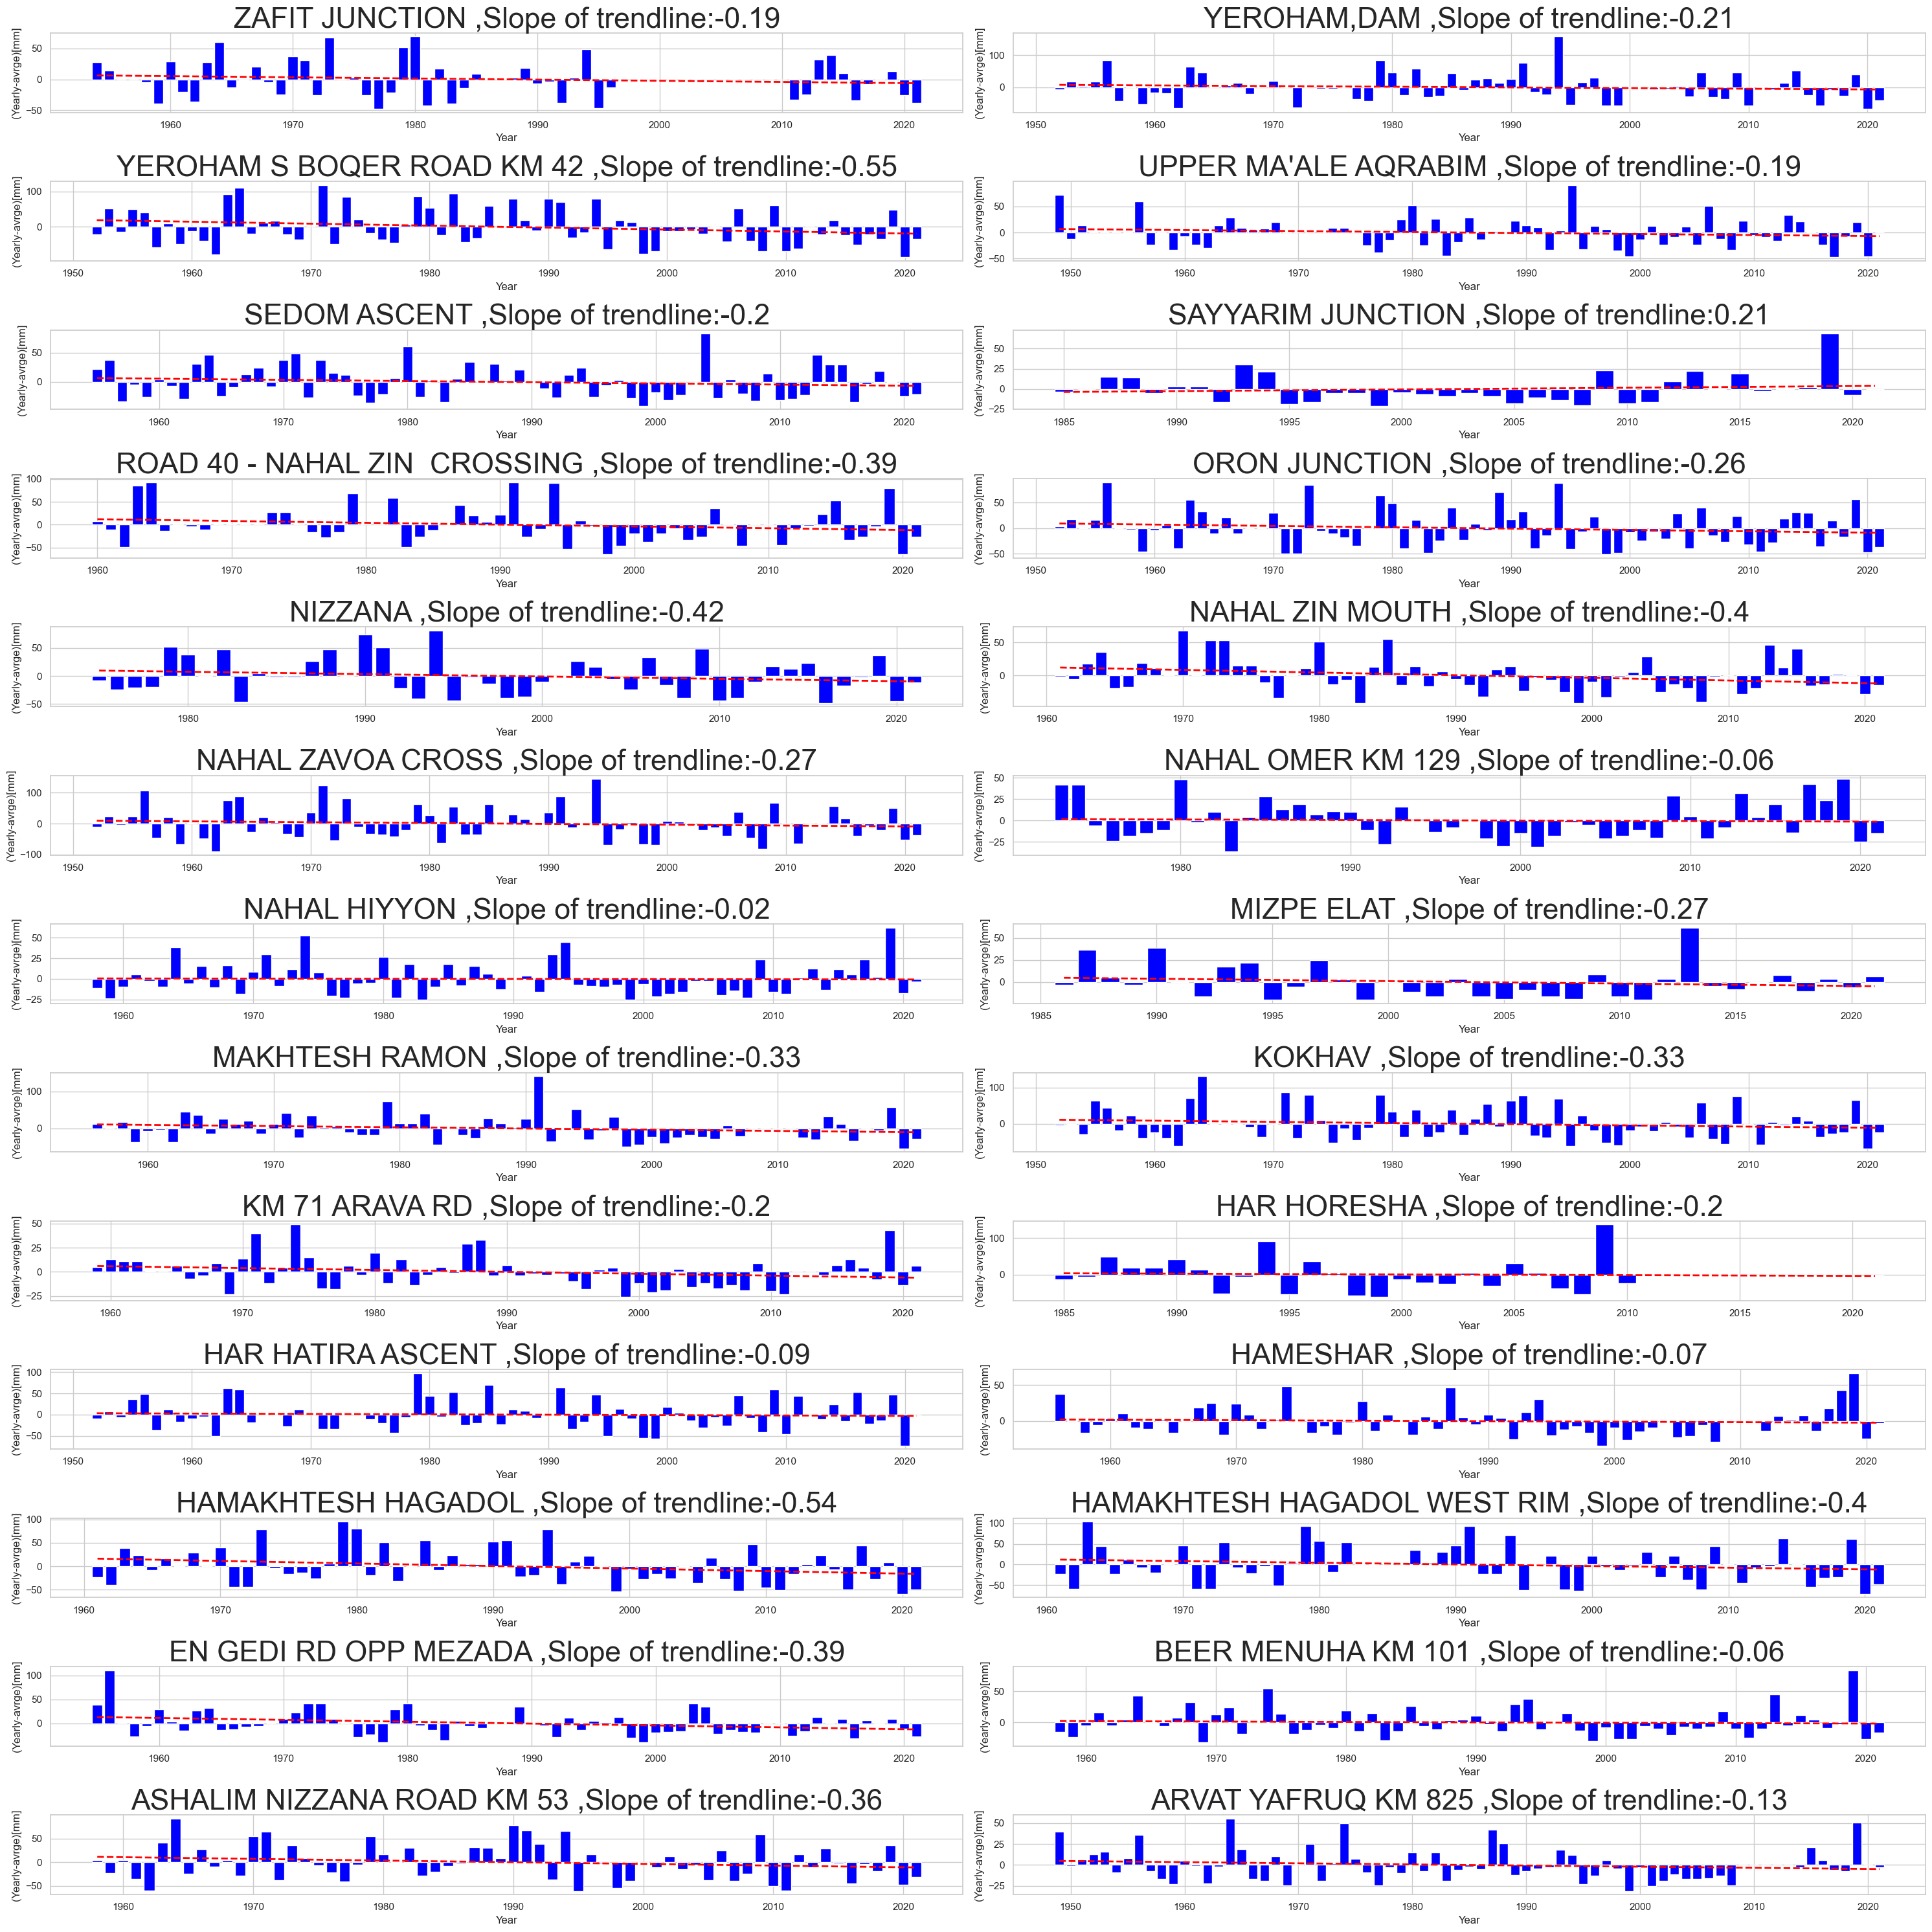

In [24]:
# Assuming df is your DataFrame with a 'date' column and other columns
date_column_name = 'date'

# Specify the columns for which you want to create graphs
columns_to_plot = df.columns[0:26]  # Assuming you want to plot the first 9 columns

# Create subplots
fig, axs = plt.subplots(13,2, figsize=(30, 30))

# Flatten the axs array to iterate over subplots
axs = axs.flatten()

# Iterate over the specified columns
for ax, column_name in zip(axs, columns_to_plot):
    # Calculate the average of the current column
    
    data = df[['year', column_name]].dropna()
    average_column = df[column_name].mean()
    # Plot a bar graph for the current column
    ax.bar(data['year'], (data[column_name]- average_column ), color='blue')

    # Fit a linear regression line
    z = np.polyfit(data['year'], data[column_name] - average_column, 1)
    p = np.poly1d(z)

    # Plotting the trend line
    ax.plot(data['year'], p(data['year']), color='red', linestyle='--', linewidth=2)
    #ax.plot(kind='bar', edgecolor='white', linewidth=3)
    # Customize the subplot
    #numpy.around(a, decimals=0, out=None)
    slope =np.around(z[0], decimals=2, out=None) 
    ax.set_title(f'{column_name} ,Slope of trendline:{slope }', fontsize=32)

    ax.set_xlabel('Year')
    ax.set_ylabel('(Yearly-avrge)[mm]')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
# plt.savefig("Processed Data/annual Rine relative to the average.jpg")


## We can observe that generally the trendline is negative, but it depends on how we choose the starting and ending years to measure the trendline. That's why we will build all the possible trendlines in a heatmap.

In [25]:
hit_map = pd.read_csv("Processed Data/Good stations for toltip map.csv") 

# Calculate the slope between years.

In [26]:
at_last_years = 1
def calculate_slope(data, column_name, start_year, end_year):
    
    if start_year >= end_year-1-at_last_years :
        return 0
    # Convert the 'date' column to datetime and create a 'year' column
    data['year'] = pd.to_datetime(data['date'], format='%Y-%m-%d').dt.year

    # Filter the data based on the specified range of years
    selected_data = data.loc[(data['year'] >= start_year) & (data['year'] <= end_year)]

    if selected_data[column_name].isna().any():
        return 0 


    # Remove rows with NaN values in the selected column
    selected_data = selected_data[['year', column_name]].dropna()

    # Calculate the average of the selected column
    average_column = selected_data[column_name].mean()

    # Fit a linear regression line
    z = np.polyfit(selected_data['year'], selected_data[column_name] - average_column, 1)
    
    # Return the slope of the trend line
    return np.around(z[0], decimals=4, out=None)





# An empty matrix for a heat map

In [27]:


# Display the DataFrame
end_year = 2021
start_year = 1950
# Create a date range for the index
index_range = pd.date_range(start=f'{start_year}', end=f'{end_year}', freq='AS')
# Create a DataFrame with zeros
ampte = pd.DataFrame(0, index=index_range, columns=index_range)

## Function calculates slope by year and column name for all possibilities.


In [28]:
def calculate_sum_of_years(df,station_name):
    """
    Calculate the sum of corresponding years for each element in the DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - result_df: pandas DataFrame with values representing the sum of corresponding years
    """
    num_rows, num_columns = df.shape
    result_df = pd.DataFrame(index=df.index, columns=df.columns, dtype=int)

    for i in range(num_rows):
        for j in range(num_columns):
            result_df.iloc[i, j]= calculate_slope(hit_map,station_name , df.index[i].year, df.columns[j].year)#df.index[i].year + df.columns[j].year

    return result_df

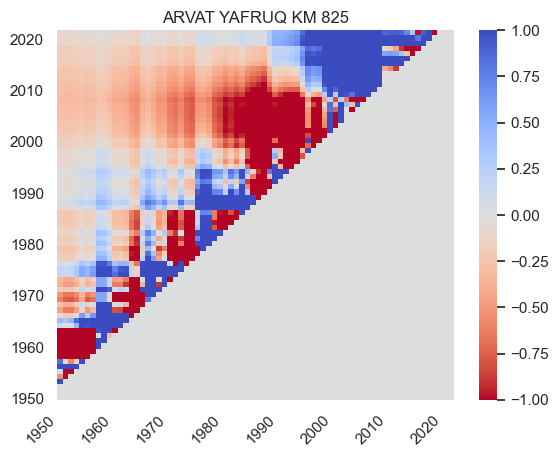

In [29]:
reversed_cmap = ListedColormap(sns.color_palette('coolwarm', n_colors=256)[::-1])

def onegraf(station_name):
    result_df = calculate_sum_of_years(ampte,station_name)
    # Create a reversed 'bwr' colormap

    # Assuming 'result_df' is your DataFrame with calculated values
    ax = sns.heatmap(result_df.transpose(), vmin=-1, vmax=1, cmap=reversed_cmap)
    
    ax.invert_yaxis()

    # Set ticks at every five years
    years = result_df.columns.year
    ax.set_xticks(range(0, len(years), 10))
    ax.set_xticklabels(years[::10], rotation=45, ha='right')

    ax.set_yticks(range(0, len(years), 10))
    ax.set_yticklabels(years[::10])

    ax.set_title(station_name)  # Add column name as the titl])

    # Show the plot
onegraf("ARVAT YAFRUQ KM 825" )
# plt.savefig('Processed Data/hit map exmple.png')

#  Example plot showing all possible trendlines of one station, with the slope represented by the color between the starting and ending years on the axes.

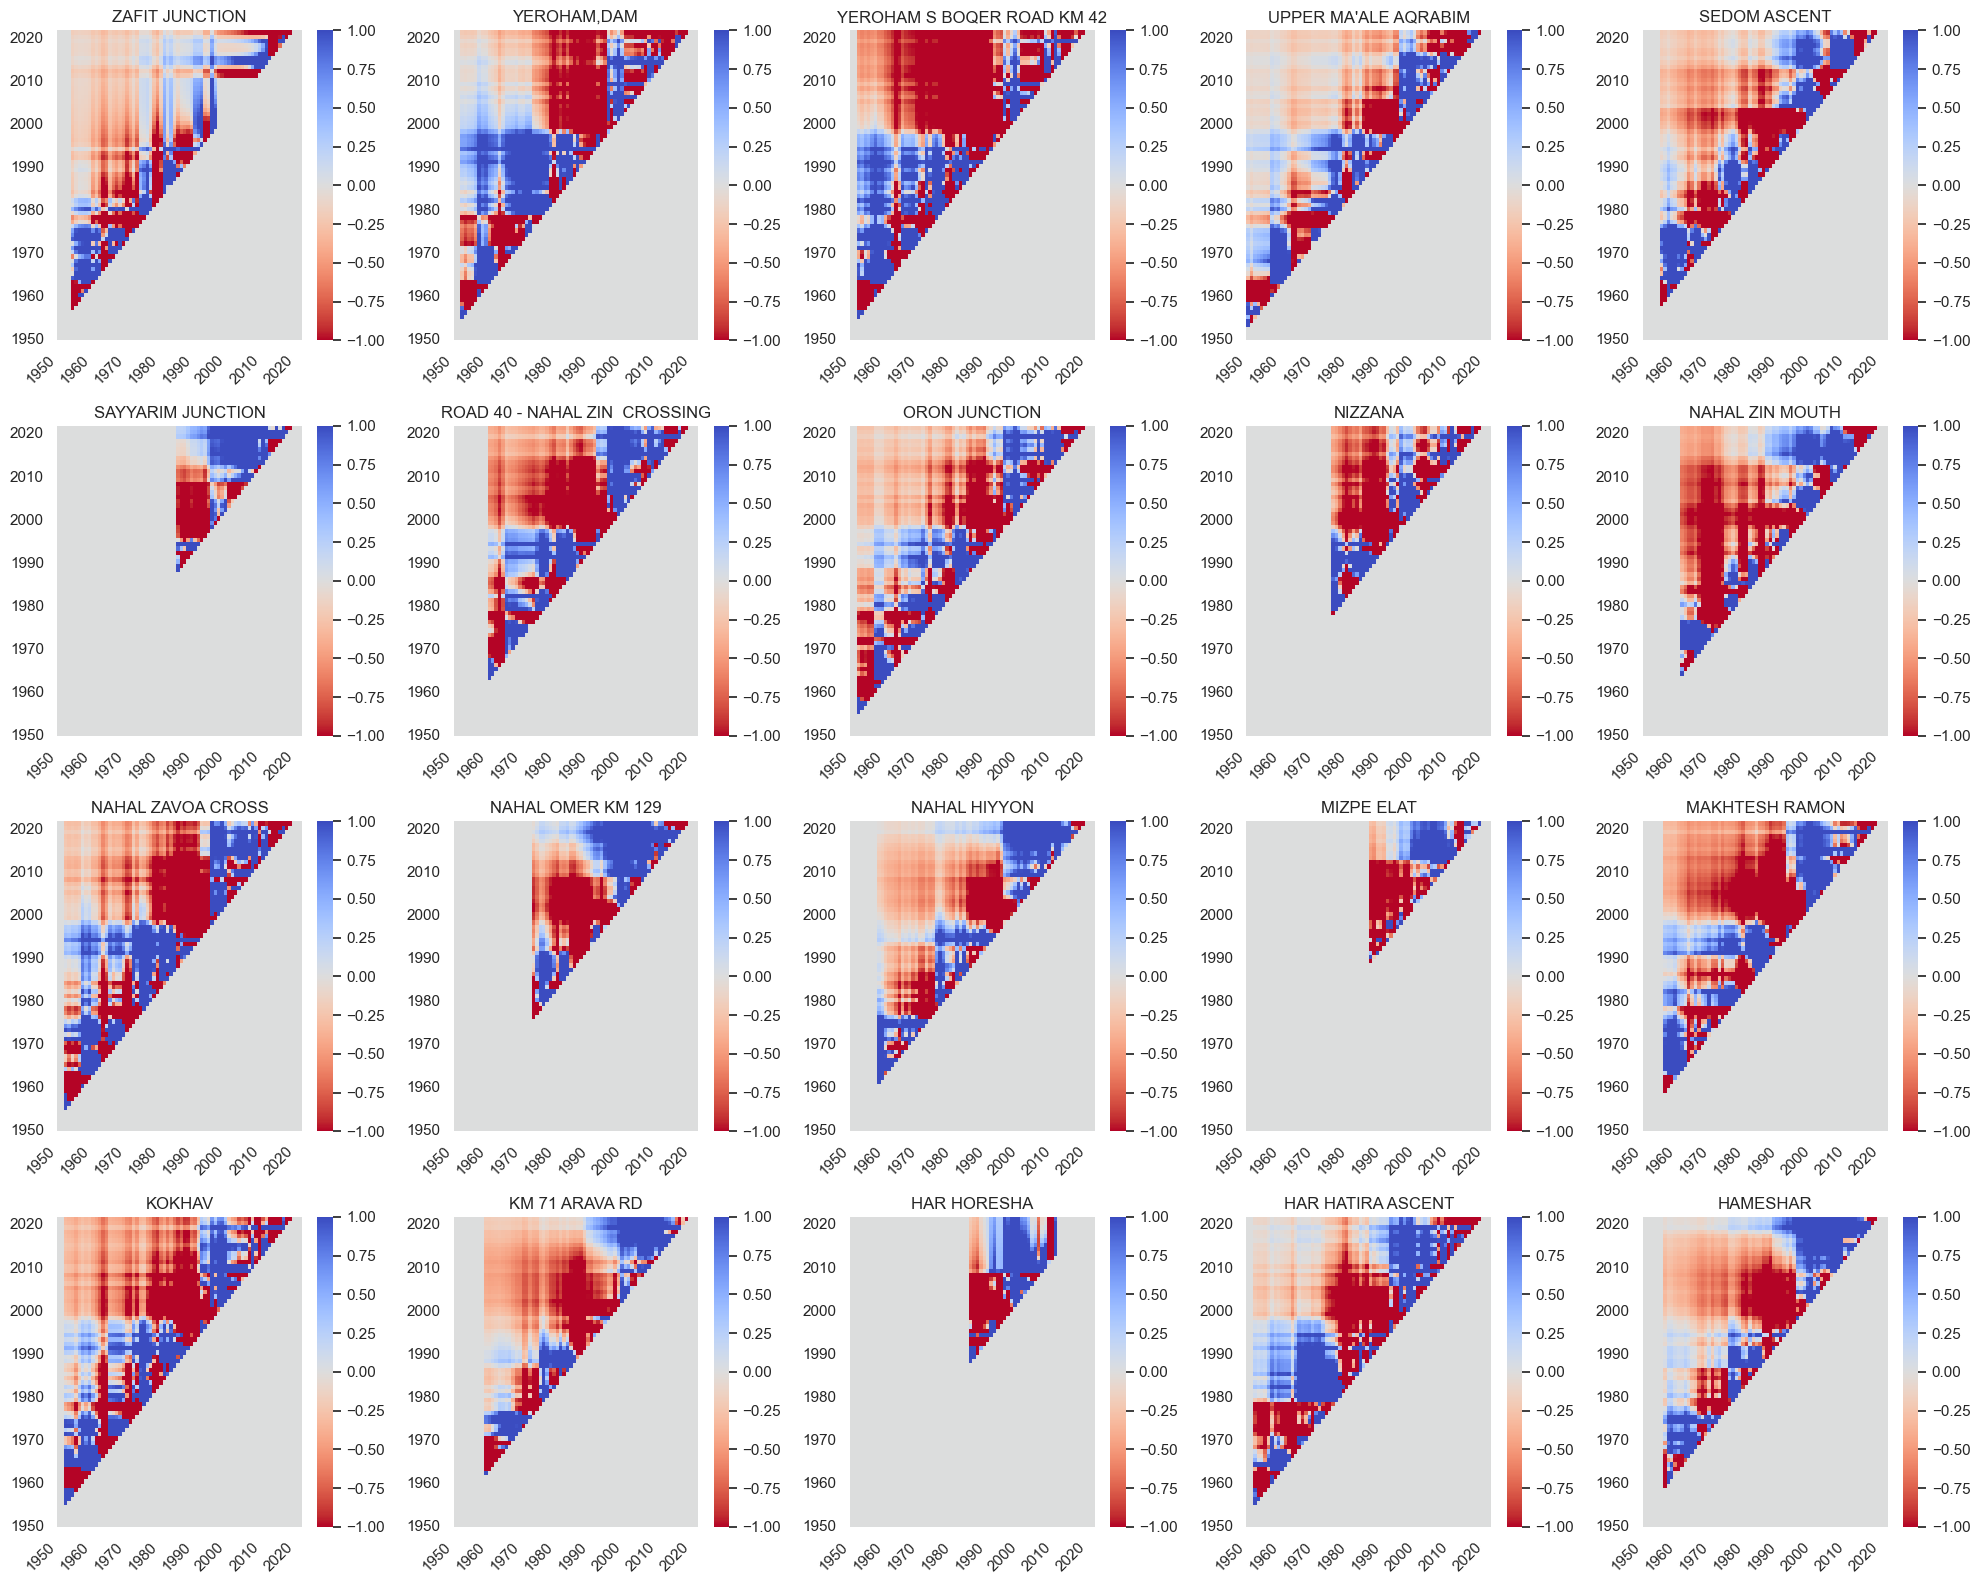

In [30]:



# Create a 4x5 subplot grid
fig, axs = plt.subplots(4, 5, figsize=(20, 16))

# Loop over desired columns and generate heatmaps
for i, column_name in enumerate(hit_map.columns[1:21]):  # Adjust to select the first 20 columns
    # Calculate row and column indices
    row_index = i // 5
    col_index = i % 5

    # Set the current axis in the subplot grid
    plt.sca(axs[row_index, col_index])

    # Call the function to generate the heatmap
    onegraf(column_name)

plt.tight_layout()  # Adjust layout for better spacing
#plt.show()
# plt.savefig('Processed Data/hit map full.png')

In [31]:
#At least a decade of measurements
at_last_years = 10 


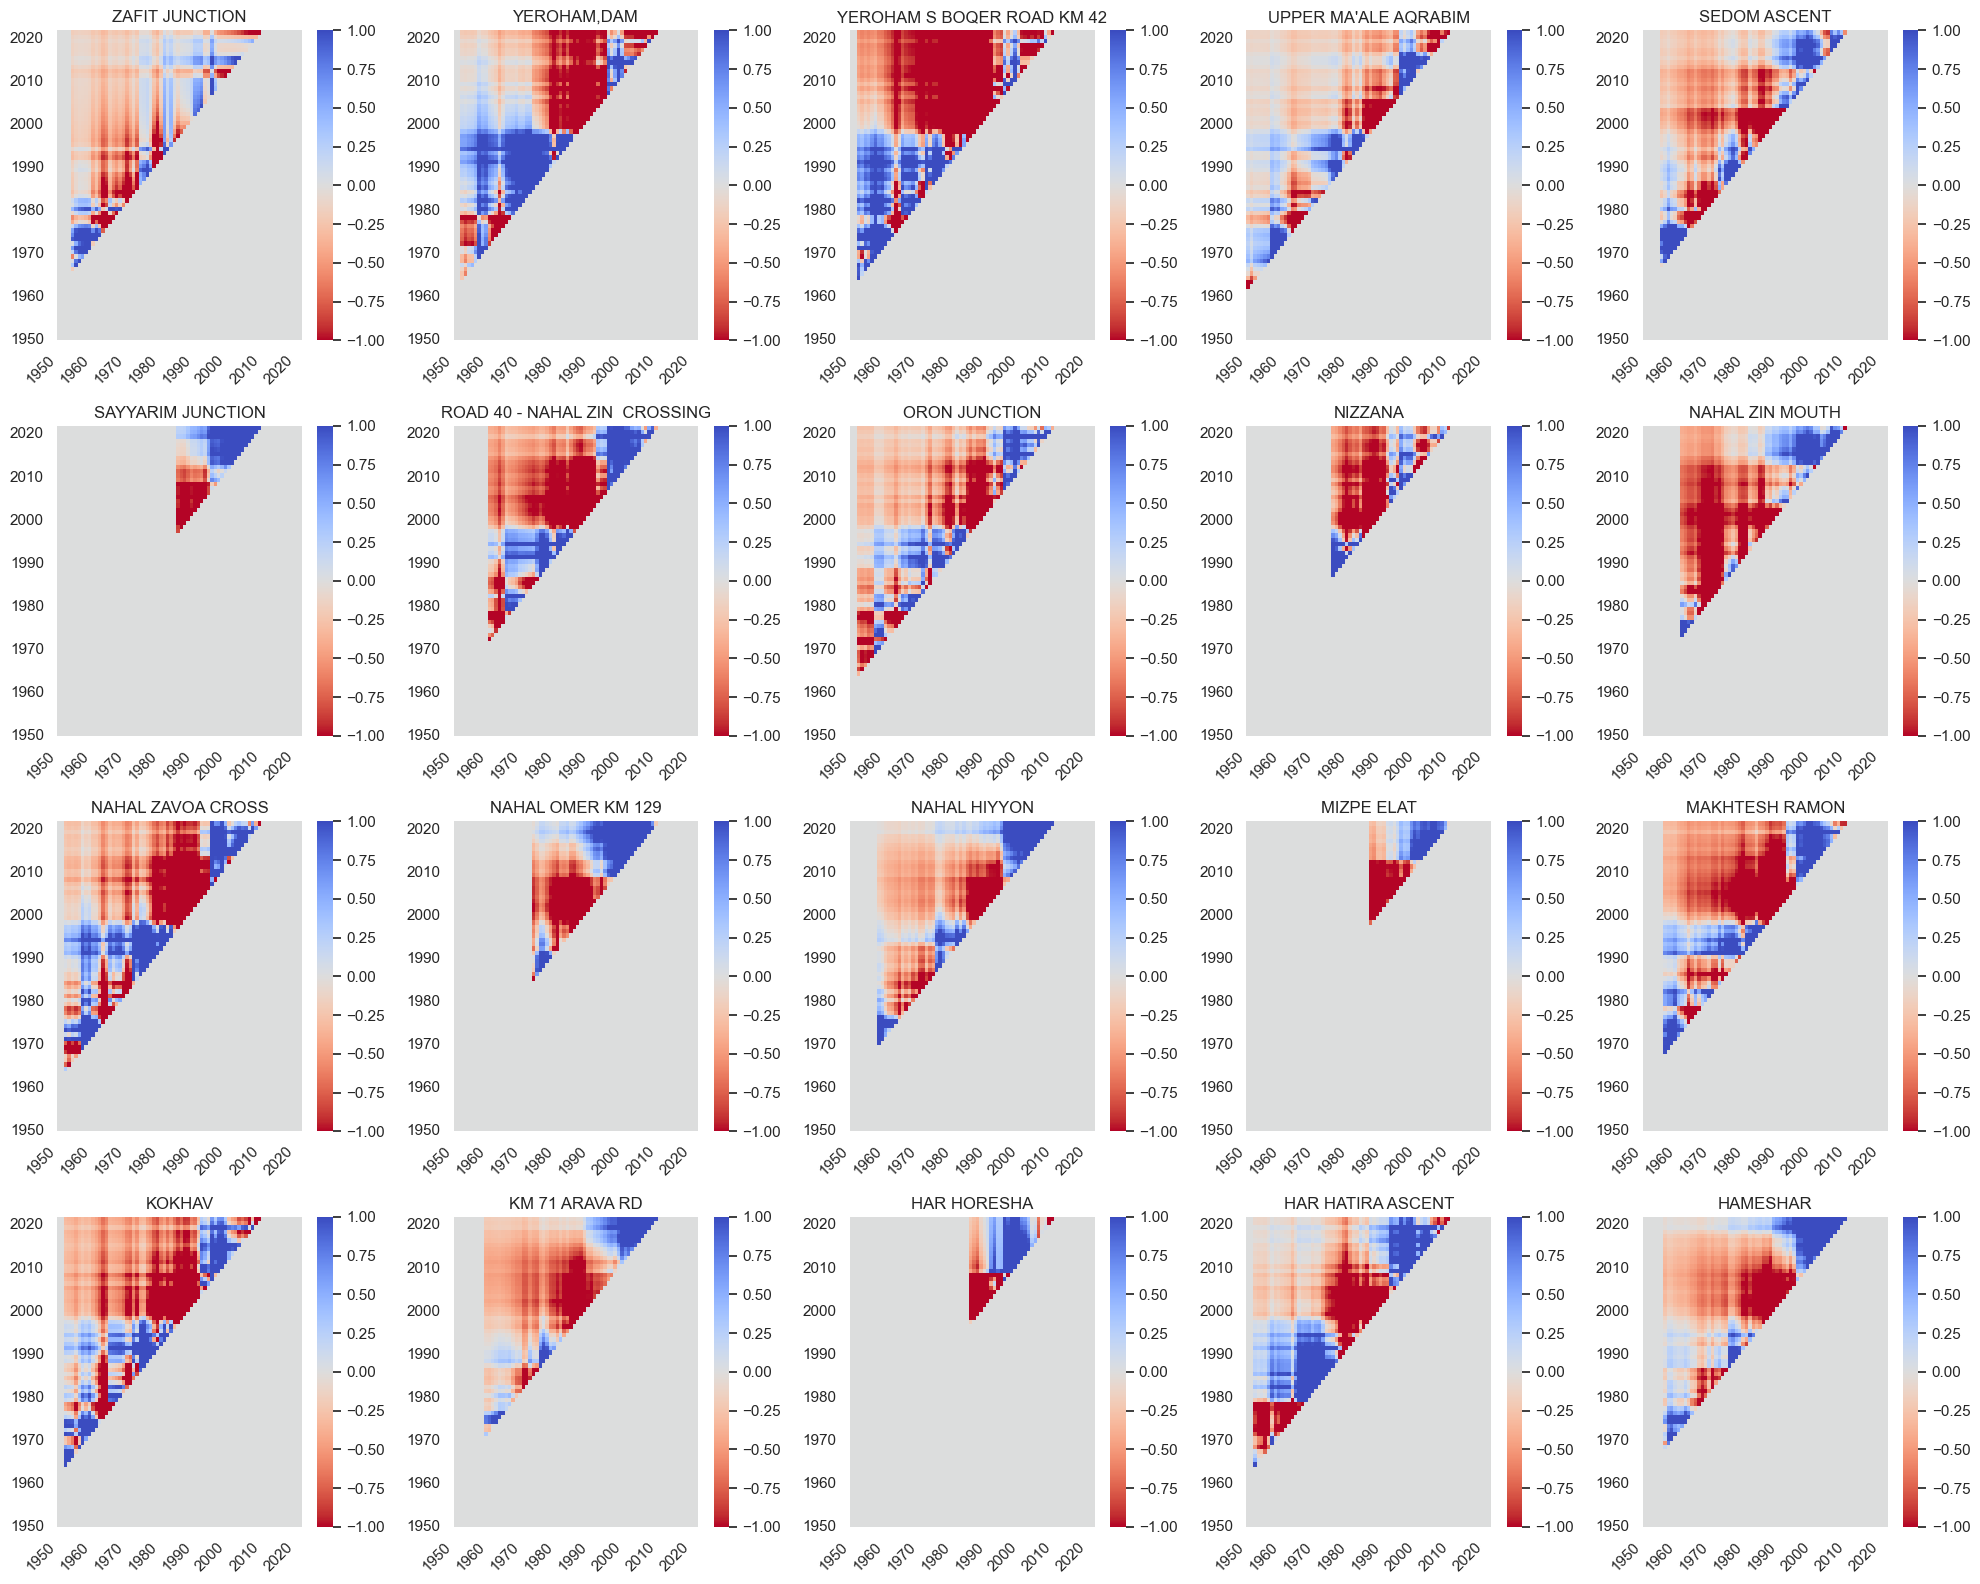

In [32]:
fig, axs = plt.subplots(4, 5, figsize=(20, 16))

# Loop over desired columns and generate heatmaps
for i, column_name in enumerate(hit_map.columns[1:21]):  # Adjust to select the first 20 columns
    # Calculate row and column indices
    row_index = i // 5
    col_index = i % 5

    # Set the current axis in the subplot grid
    plt.sca(axs[row_index, col_index])

    # Call the function to generate the heatmap
    onegraf(column_name)

plt.tight_layout()  # Adjust layout for better spacing
# plt.show()
# plt.savefig('Processed Data/hit map full 10 years.png')

# We drop the measurements less than 10 years for more accuracy.

# We can see that, in general, the trendline is downward.

## for fun ,city like plot 

In [33]:

# Convert the 'date' column to datetime if it's not already in datetime format
stations['date'] = pd.to_datetime(stations['date'])

stations_yearly = stations.copy()
# Set 'date' column as the index
stations_yearly.set_index('date', inplace=True)

# Aggregate rainfall by year for each station
stations_yearly = stations_yearly.resample('Y').sum()

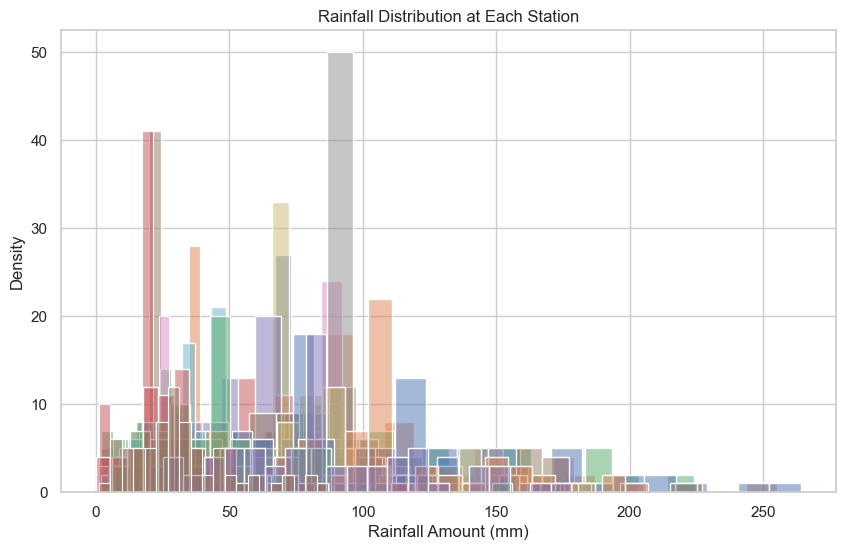

In [34]:

plt.figure(figsize=(10, 6))
for column in stations_yearly.columns:
    sns.histplot(stations_yearly[column], bins=20, kde=False, label=column, alpha=0.5)
plt.title('Rainfall Distribution at Each Station')
plt.xlabel('Rainfall Amount (mm)')
plt.ylabel('Density')
plt.show()
